# JS learning

## 變數宣告
- var - js2015唯一宣告變數的方法，宣告就是全域變數
- const - 常數(constant)是無法被覆寫的變數，在設計的時候有些變數就不應該被修改
- let - 在 modern js 中時做了語法變數域 (Lexical Variable Scope, 又稱靜態變數域)。在js的區塊中，{}中間的區域會產生一個新的變數作用域(Variable Scope)

In [45]:
var topic = "JS"

if (topic) {
    var topic = "React"
    console.log(topic)
}

console.log("global", topic)

React
global React


undefined

In [46]:
// 使用let將變數侷限在大括號內，避免污染 global var
var topic = "JS"

if (topic) {
    let topic = "React"
    console.log(topic)
}

console.log("global", topic)

React
global JS


undefined

## Template String
像是 Python 的 f-string，讓人可以輕易將變數遷入字串中。

In [1]:
const firstName = "Wei"

const email = `
    Hello ${firstName},

    BR
`
console.log(email)


    Hello Wei,

    BR



undefined

## 創建函式
創建 function 有兩種，平常這兩種方法效果是類似的，但是函數宣告會被提吊(Hoist)，但是函數指派不會。 </br>
提吊(Hoist): 函數會先被搜集然後放到與區塊的最上方，因此宣告函式跟呼叫函式的順序不影響執行
### 函式宣告
```
function a(){
    console.log("hi");
}
```
### 函數指派
```
const a = function() {
    console.log("hi")
}
a()
```

### 傳遞引數

In [2]:
const login = function(name) {
    console.log(`Welcome, ${name}`);
};

login("Wei")

Welcome, Wei


undefined

### 傳遞的引數可以不只一個

In [3]:
const loginWithMessage = function(name, msg) {
    console.log(`Welcome, ${name} : ${msg}`);
};

loginWithMessage("Wei", "Grab a pizza.")

Welcome, Wei : Grab a pizza.


undefined

### 也能會參數提供預設值

In [4]:
const loginWithDefaultMessage = function(name = "DoDo", msg = "Yo") {
    console.log(`Welcome, ${name} : ${msg}`);
};

undefined

In [5]:
loginWithDefaultMessage("Wei", "Grab a burger")
loginWithDefaultMessage()

Welcome, Wei : Grab a burger
Welcome, DoDo : Yo


undefined

### 函數回傳值

In [6]:
const createCompliment = function(name, msg) {
    return `${name}: ${msg}`
}

undefined

In [7]:
createCompliment("wei", "hi")

'wei: hi'

## Arrow function
這是 js ES6 的最新功能。
有了 Arrow function, 可以在不使用 function 的情況創建函式

In [8]:
function lordify(name) {
    return `${name} of canterbury`;
}

undefined

In [9]:
lordify("Wei")

'Wei of canterbury'

透過 Arrow function 作為語法糖。 function跟return都可以被省略。

In [10]:
lordify = name => `${name}!`

[Function: lordify]

In [11]:
lordify("wei")

'wei!'

如果參數跟設計功能比較複雜，就用()來裝引數，{}來放設計功能

In [12]:
complexFun = (name, land) => {
    if (!name) {
        throw new Error("Name is required")
    }

    return `${name} of ${land}`
}

[Function: complexFun]

In [13]:
complexFun("Wei", "Taiwan")

'Wei of Taiwan'

### Arrow function : 回傳物件

In [14]:
const person = (firstName, secondName) => {
    first: firstName,
    second: secondName
}

SyntaxError: Unexpected token ':'

以上問題很常發生，只要將物件用()包覆就能解決這個問題

In [15]:
const person = (firstName, secondName) => ({
    first: firstName,
    second: secondName
})

undefined

In [16]:
person("WeiTing", "Wu")

{ first: 'WeiTing', second: 'Wu' }

## Arrow function Scope

標準函式並不會靜態地決定this的scope

In [17]:
const tahoe = {
    mountains: ["Freel", "Rose", "Tallac", "Rubicon"],
    print: function(delay = 1000) {
        setTimeout(function(){
            console.log(this.mountains.join(","))
        }, delay)
    }
}

undefined

In [18]:
tahoe.print()

undefined

以上錯誤代表this.mountains並沒有被解析成 string array.

In [19]:
const tahoe_debug = {
    mountains: ["Freel", "Rose", "Tallac", "Rubicon"],
    print: function(delay = 1000) {
        setTimeout(function(){
            console.log(this)
            console.log(this.mountains.join(","))
        }, delay)
    }
}

undefined

In [20]:
tahoe_debug.print()

undefined

要解決這個問題可以使用 arrow function, 把this固定在靜態的scope

In [21]:
const tahoe_arrow = {
    mountains: ["Freel", "Rose", "Tallac", "Rubicon"],
    print: function(delay=1000) {
        setTimeout(() => {
            console.log(this.mountains.join(", "));
        }, delay);
    }
}

TypeError: Cannot read properties of undefined (reading 'join')
    at Timeout._onTimeout (evalmachine.<anonymous>:5:40)
    at listOnTimeout (node:internal/timers:569:17)
    at process.processTimers (node:internal/timers:512:7)

undefined

In [22]:
tahoe_arrow.print()

undefined

要注意的是，arrow function並沒有自己的this scope, 因此會指向上層的global scope

In [23]:
const tahoe_arrow2 = {
    mountains: ["Freel", "Rose", "Tallac", "Rubicon"],
    print: (delay=1000) => {
        setTimeout(() => {
            console.log(this.mountains.join(", "));
        }, delay);
    }
}

Timeout {
  _idleTimeout: 1000,
  _idlePrev: null,
  _idleNext: null,
  _idleStart: 6184,
  _onTimeout: [Function (anonymous)],
  _timerArgs: undefined,
  _repeat: null,
  _destroyed: false,
  [Symbol(refed)]: true,
  [Symbol(kHasPrimitive)]: false,
  [Symbol(asyncId)]: 83,
  [Symbol(triggerId)]: 80
}


TypeError: Cannot read properties of undefined (reading 'join')
    at Timeout._onTimeout (evalmachine.<anonymous>:6:40)
    at listOnTimeout (node:internal/timers:569:17)
    at process.processTimers (node:internal/timers:512:7)

undefined

In [24]:
tahoe_arrow2.print()

undefined

Freel, Rose, Tallac, Rubicon


## !TODO: 理解 js 的this scope.

## 物件與陣列 (Object & Array)

### 物件解構 Destructuring Assignment

In [25]:
const burger = {
    bread: "bun",
    meat: "beef",
    cheese: "swiss",
    toppings: ["lettuce", "tomato", "mustard"]
}

undefined

TypeError: Cannot read properties of undefined (reading 'join')
    at Timeout._onTimeout (evalmachine.<anonymous>:5:40)
    at listOnTimeout (node:internal/timers:569:17)
    at process.processTimers (node:internal/timers:512:7)

In [26]:
let {bread, meat} = burger

undefined

In [27]:
console.log(bread, meat)

bun beef


undefined

In [28]:
showBurger = ({bread, meat, cheese, toppings}) => {
    console.log(`
        bread = ${bread}
        meat = ${meat}
        cheese = ${cheese}
        toppings = ${toppings}`)
}

[Function: showBurger]

In [29]:
showBurger(burger)


        bread = bun
        meat = beef
        cheese = swiss
        toppings = lettuce,tomato,mustard


undefined

In [30]:
const Combo1 = {
    drink: "coke zero",
    meal: burger
}

undefined

物件解構也可以解開巢狀物件

In [31]:
showMeal = ({meal: {bread, cheese}}) => {
    console.log(`${bread}, ${cheese}`)
}

[Function: showMeal]

In [32]:
showMeal(Combo1)

bun, swiss


undefined

### 陣列解構

In [33]:
let [firstAnimal] = ["House", "Cat", "Dog"]

undefined

In [34]:
firstAnimal

'House'

In [35]:
let [, , thirdAnimal] = ["House", "Cat", "Dog"]

undefined

In [36]:
thirdAnimal

'Dog'

### 物件語法強化

物件解構的反向操作，能讓我們透過精簡的語法將變數重組成物件

In [37]:
let name = "Tic Tac Toe"
let elevation = 9453
let funHike = {name, elevation}

undefined

In [38]:
funHike

{ name: 'Tic Tac Toe', elevation: 9453 }

In [39]:
let print = () => {
    console.log(`Mt.${this.name} is ${this.elevation} feets tall`)
}

undefined

In [41]:
let funHikeObj = {name, elevation, print}

undefined

In [42]:
funHikeObj.print()

Mt.undefined is undefined feets tall


undefined

在語法強化的幫助下，創建物件的method時，不再需要使用function關鍵字

In [43]:
let n = "Tallac"
let sound = "roar"

undefined

In [45]:
skier = {
    n,
    sound,
    powerYell() {
        let yell = this.sound.toUpperCase();
        console.log(yell)
    },
    speed(mph) {
        this.speed = mph;
        console.log("speed:", mph)
    }
}

{
  n: 'Tallac',
  sound: 'roar',
  powerYell: [Function: powerYell],
  speed: [Function: speed]
}

In [46]:
skier.powerYell()

ROAR


undefined

In [47]:
skier.speed(100)

speed: 100


undefined

In [48]:
skier.speed

100

### 延展運算子 Spread operator
The spread (...) syntax allows an iterable, such as an array or string, to be expanded in places where zero or more arguments (for function calls) or elements (for array literals) are expected. In an object literal, the spread syntax enumerates the properties of an object and adds the key-value pairs to the object being created.

In [49]:
const peaks = ["Tallc", "Ralston", "Rose"]
const canyons = ["Ward", "BlackWood"]

undefined

In [51]:
const all_mounts = [...peaks, ...canyons]

undefined

In [52]:
all_mounts

[ 'Tallc', 'Ralston', 'Rose', 'Ward', 'BlackWood' ]

In [53]:
const [last] = [...all_mounts].reverse()

undefined

In [54]:
last

'BlackWood'

In [55]:
all_mounts

[ 'Tallc', 'Ralston', 'Rose', 'Ward', 'BlackWood' ]

也可用於取得剩餘(rest)的成員

In [58]:
let [first, ...others] = all_mounts

SyntaxError: Identifier 'first' has already been declared

In [60]:
others

[ 'Ralston', 'Rose', 'Ward', 'BlackWood' ]

也可以有類似 python args 的用法

In [78]:
directions = (...args) => {
    let [start, ...remaining] = args;
    let [finish, ...stops] = remaining.reverse()

    console.log(`開車經過 ${args.length} 座山`)
    console.log(`起點是 ${start}`)
    console.log(`終點是 ${finish}`)
    console.log(`途中經過 ${stops}`)
}

[Function: directions]

In [79]:
all_mounts

[ 'Tallc', 'Ralston', 'Rose', 'Ward', 'BlackWood' ]

In [80]:
directions(...all_mounts)

開車經過 5 座山
起點是 Tallc
終點是 BlackWood
途中經過 Ward,Rose,Ralston


undefined

用在物件中也可以

In [82]:
morning = {
    breakfast: "oatmeal",
    lunch: "burber"
}

{ breakfast: 'oatmeal', lunch: 'burber' }

In [83]:
dinner = "pizza"

'pizza'

In [84]:
allDayMeal = {
    ...morning,
    dinner
}

{ breakfast: 'oatmeal', lunch: 'burber', dinner: 'pizza' }

In [85]:
allDayMeal

{ breakfast: 'oatmeal', lunch: 'burber', dinner: 'pizza' }

也可以用於解構賦值

In [94]:
let {lunch, ...otherMeals} = allDayMeal

undefined

In [96]:
lunch

'burber'

In [98]:
otherMeals

{ breakfast: 'oatmeal', dinner: 'pizza' }

## 物件導向

在ES2015年以前, JS並沒有Class的語法。不過JS其實也沒有真的跟java, c++一樣有實作物件，而是用原型繼承(prototypical inheritance)來創造類似物件導向的資料結構。

在JavaScript中，原型繼承（prototypical inheritance）是一種物件間的繼承機制，其中一個物件可以繼承另一個物件的屬性和方法。每個JavaScript物件都有一個原型（prototype），並且可以從原型繼承屬性和方法。

當我們訪問一個物件的屬性或方法時，如果該物件本身沒有這個屬性或方法，JavaScript引擎會去檢查該物件的原型是否有這個屬性或方法。如果原型中也沒有該屬性或方法，引擎會繼續檢查原型的原型，這種連鎖的關係稱為原型鏈（prototype chain）。

### 原型繼承與傳統類繼承的差異

原型繼承在一般的物件導向設計中與傳統的類繼承（class inheritance）有一些差異。以下是其中一些主要差異：

- 繼承機制：在傳統的類繼承中，類定義了對象的結構和行為，並且創建新的對象時，會使用類的實例化機制。而在原型繼承中，對象直接從其他對象或原型繼承屬性和方法。
- 類與實例：在傳統的類繼承中，存在明確的類和實例的概念，類定義了對象的結構和行為，而實例是從類實例化得到的具體對象。在原型繼承中，沒有明確的類和實例的區分，每個對象都可以充當其他對象的原型。
- 動態性：原型繼承允許在運行時動態更改和擴展對象的原型，這意味著一個對象可以在運行時繼承其他對象的屬性和方法，並且對象的原型可以動態修改。這種動態性使得原型繼承在某些情況下更靈活。
- 原型鏈：在原型繼承中，對象通過原型鏈連接到它的原型，形成一個連鎖結構。這使得對象可以在原型鏈上查找和繼承屬性和方法。而在傳統的類繼承中，繼承關係通常是以階層結構的形式存在。
- 覆寫和委託：在傳統的類繼承中，子類可以覆寫父類的方法並定義自己的行為。在原型繼承中，對象可以直接修改自己的原型，也可以通過委託（delegation）將某些操作委託給其他對象處理。


### 優缺點

原型繼承擁有以下優點：

- 簡單且靈活：原型繼承的概念相對簡單，並且在JavaScript中已經內建支援。它提供了靈活的方式來繼承和擴展對象，可以在運行時動態修改和擴展原型。
- 動態性：由於原型繼承允許動態更改原型，對象可以在運行時繼承其他對象的屬性和方法，這使得原型繼承在某些情況下更具彈性。
- 資源共享：原型繼承允許多個對象共享同一個原型，這樣可以節省記憶體和資源，特別是當對象需要共享大量屬性和方法時。

然而，原型繼承也存在一些缺點：
- 隱含性：原型繼承的一個缺點是繼承關係不太明確，對象的屬性和方法來自於其原型，這種隱含性可能使程式碼的理解和維護變得困難。
- 原型汙染：在原型繼承中，對象的屬性和方法存儲在原型中，當對原型進行修改時，所有繼承自該原型的對象都會受到影響。這可能導致意外的行為，特別是在多人協作或大型應用中。
- 缺乏封裝：原型繼承並沒有提供一個明確的封裝機制，對象可以直接修改原型，這可能導致對象之間的耦合問題和意外的衝突。
- 原型鏈查找效率：在原型繼承中，當查找對象的屬性或方法時，需要遍歷整個原型鏈。這可能會導致查找效率的降低，特別是當原型鏈較長時。

綜合考慮這些優點和缺點，開發者在使用原型繼承時需要謹慎設計和管理原型鏈，確保程式碼的可讀性和可維護性。在某些情況下，其他繼承機制（如類繼承）

### 原型繼承範例
在以下的程式碼創造了一個行為模式很像物件導向程式語言的的自定義類別 Vacation, 這個類別具有屬性(dest, len)也有方法(print)。
但其實本質上創造的物件就是函式，而繼承或是實例化就是透過原型去達成

In [107]:
function Vacation(dest, len) {
    this.dest = dest
    this.len = len
}

undefined

In [108]:
Vacation.prototype.print = function () {
    console.log(`${this.dest} | ${this.len} days`)
}

[Function (anonymous)]

In [109]:
const v = new Vacation("Taiwan", 14)

SyntaxError: Identifier 'v' has already been declared

In [110]:
v.print()

Taiwan | 14 days


undefined

為了讓語法上更接近一般習慣OOP的人, ES2015推出了類別宣告跟Classe關鍵字。但其實只是語法糖，本質上還是在做上面的事情

In [112]:
class VacationClass {
    constructor(dest, len) {
        this.dest = dest
        this.len = len
    }
    print() {
        console.log(`${this.dest} | ${this.len} days`)
    }
}

undefined

In [113]:
trip = new VacationClass("CN", 1000)

VacationClass { dest: 'CN', len: 1000 }

In [114]:
trip.print()

CN | 1000 days


undefined

類別宣告完成後就可以任意將之實體化。

### 類別繼承

類別可以被繼承(Extend), 子類別會預設繼承父類別的方法與屬性，當然也可以在子類別上面重設子類別來的方法與屬性

In [116]:
class Expedition extends Vacation {
    constructor (dest, len, gear) {
        super(dest, len)
        this.gear = gear
    }

    print() {
        super.print()
        console.log(`Bring your ${this.gear.join(" and ")}`)
    }
}

undefined

In [117]:
expedition = new Expedition(
    "Taipei",
    3,
    ["Laptop", "CellPhone"]
)

Expedition { dest: 'Taipei', len: 3, gear: [ 'Laptop', 'CellPhone' ] }

In [118]:
expedition.print()

Taipei | 3 days
Bring your Laptop and CellPhone


undefined

## ES6 模組 v.s. CommonJS 模組

模組(Module)是一段可以重複使用的程式碼，可以輕鬆被整合進目前的程式中，卻不會導致變數的命名衝突

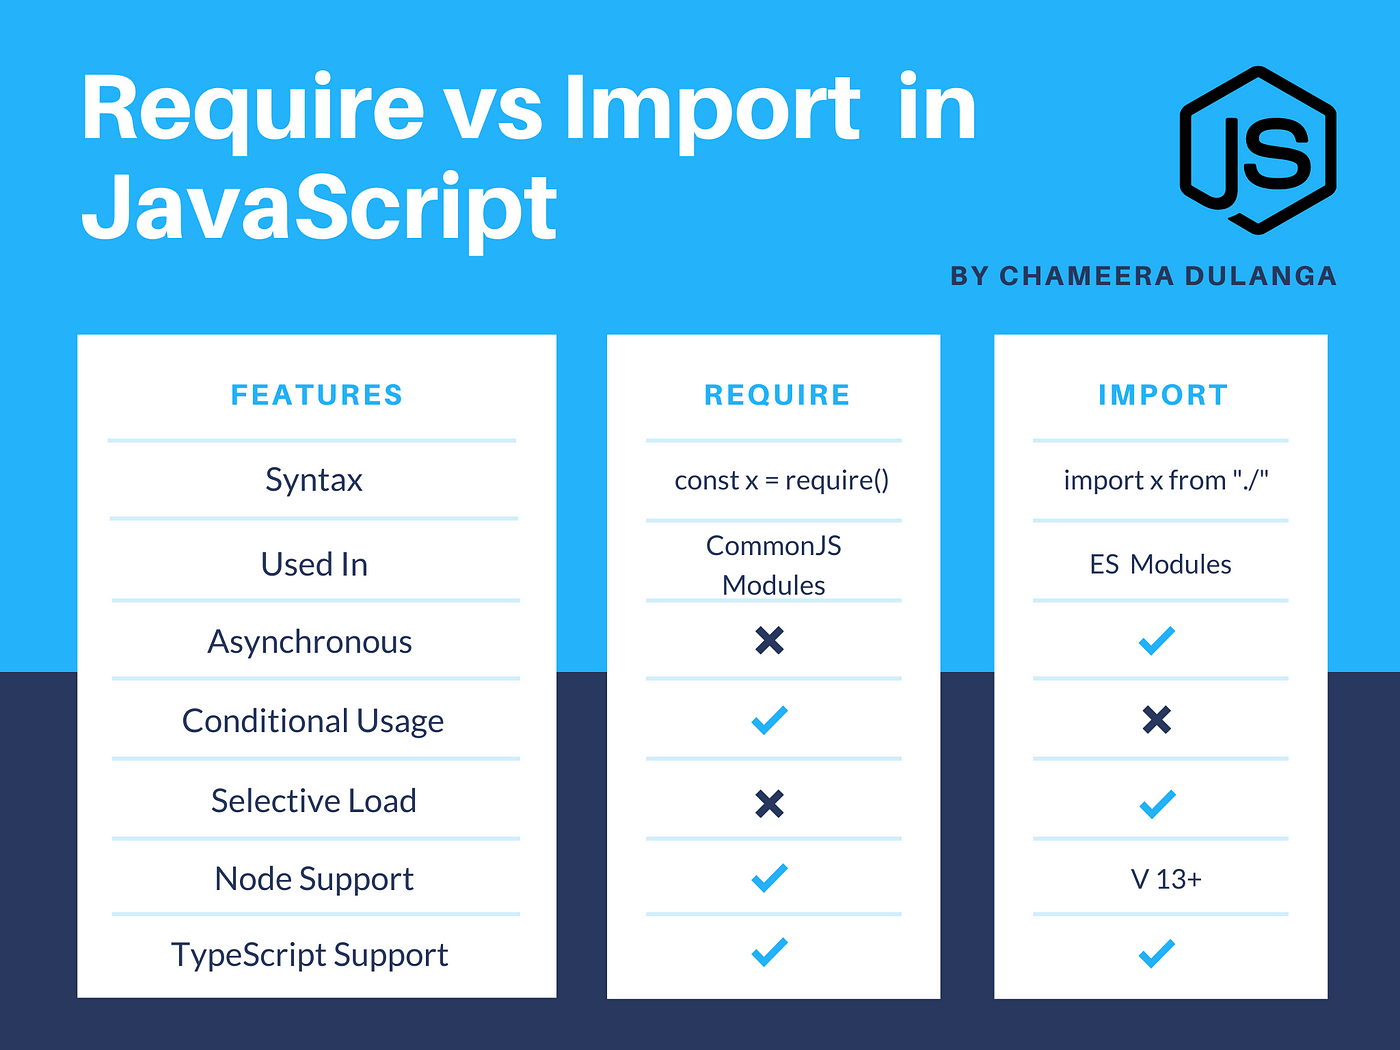